In [1]:
ReloadProject('deep_learning')

Path /workspace/external/deep_learning added to PYTHON_PATH.


Using TensorFlow backend.


notebook_init.py imported and reloaded
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: Dict
forwarded symbol: InputLayer
forwarded symbol: List
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: Tuple
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: model_optimization
forwarded symbol: model_optimization
reloaded: openai_wrapper
forwarded symbol: openai_wrapper
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_function_memoization
forwarded symbol: q_function_memoization
reloaded: q_learning
forwarded symbol: q_learning
reloaded: q_learning_impl
forwarded symbol: q_learning_impl
reloaded: q_learning_impl_v2
forwarded symbol: q_learning_impl_v2
reloaded: q_learning_v2
forwarded symbol: q_learning_v2


## Introduction
In this approach a "policy" is a 4-vector, which when dotted with the environment variable decides the action depends on the sign of the result. The idea is to use greedest decend method to find the best policy that gives the best value, and the value is decided via simulation.

In [17]:
def GetPolicyValue(
    policy: np.ndarray,
    env: openai_wrapper.GymEnvironment,
    num_simulations: int = 100,
    max_steps_in_simulation: int = 5000,
    print_values: bool = False,
) -> float:
    """Gets the potential value of a policy via simulation."""
    env.ChangeSettings(continue_from_done=False)
    values = []
    for _ in range(num_simulations):
        values.append(_GetValueFromOneSimulation(policy, env, max_steps_in_simulation))
    if print_values:
        print(values)
    return np.average(values)

def _GetValueFromOneSimulation(
    policy: np.ndarray,
    env: openai_wrapper.GymEnvironment,
    max_steps_in_simulation: int,
) -> int:
    """Gets the value of a policy using one simulaion."""
    env.Reset()
    reward = 0.0
    for _ in range(max_steps_in_simulation):
        state = env.GetState()
        try:
            reward += env.TakeAction(_DecideAction(policy, state))
        except openai_wrapper.OpenAiEnvironmentDone:
            break
    return reward
        
def _DecideAction(
    policy: np.ndarray,
    state: np.ndarray,
) -> int:
    """Decides an action based on a policy and a state."""
    action = 0 if np.dot(policy, state) < 0 else 1
#     print(state, action)
    return action

In [3]:
GetPolicyValue(np.random.rand(1, 4), openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))

186.41

In [ ]:
BEST_POLICY = [0.29429113, 0.55242426, 1.05572365, 1.27730287]
GetPolicyValue(BEST_POLICY, openai_wrapper.GymEnvironment(gym.make('CartPole-v1')))

In [9]:
env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))

DEBUG_HISTORY = []
def EvaluatePolicy(policy: np.ndarray) -> float:
    score = -GetPolicyValue(policy, env)
    DEBUG_HISTORY.append([policy, score])
    print('%d: %s, %s' % (len(DEBUG_HISTORY), score, policy))
    return score

In [23]:
from scipy import optimize
DEBUG_HISTORY = []
best_policy = np.array(optimize.fmin(EvaluatePolicy, np.random.rand(1, 4), disp=True))
print('The best policy: %s, value: %s' % (best_policy, EvaluatePolicy(best_policy)))

1: -217.94, [0.54217784 0.46289368 0.6995745  0.73812184]
2: -188.84, [0.56928673 0.46289368 0.6995745  0.73812184]
3: -212.52, [0.54217784 0.48603836 0.6995745  0.73812184]
4: -230.31, [0.54217784 0.46289368 0.73455322 0.73812184]
5: -210.66, [0.54217784 0.46289368 0.6995745  0.77502793]
6: -257.75, [0.51506894 0.47446602 0.71706386 0.75657489]
7: -288.59, [0.48796005 0.48025219 0.72580854 0.76580141]
8: -261.2, [0.51506894 0.48314528 0.73018088 0.71505553]
9: -279.55, [0.5015145  0.45855405 0.74548407 0.74042847]
10: -336.47, [0.48118283 0.47952892 0.76843886 0.74158179]
11: -410.52, [0.45068533 0.48784654 0.80287105 0.74331176]
12: -397.44, [0.43543657 0.49200535 0.76761905 0.74417675]
13: -409.35, [0.42272928 0.47618379 0.79071047 0.78180366]
14: -477.18, [0.39689112 0.50958989 0.79802048 0.77711832]
15: -499.0, [0.34457943 0.53510781 0.82428868 0.79546324]
16: -499.0, [0.33875525 0.51531955 0.86693608 0.76657629]
17: -499.0, [0.34293807 0.51522349 0.87478409 0.79940073]
18: -499.0

KeyboardInterrupt: 

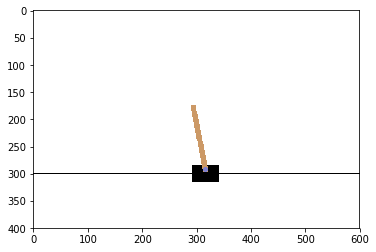

OpenAiEnvironmentDone: gym environment returned done.

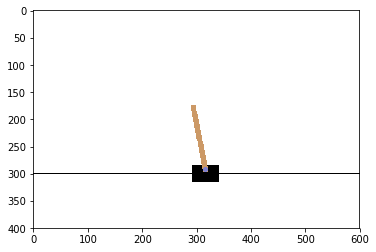

In [6]:
test_env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
test_env.ChangeSettings(continue_from_done=False, plot=True)
for _ in range(2000):
    state = test_env.GetState()
    test_env.TakeAction(_DecideAction(best_policy, state))

In [ ]:
test_env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
test_env.ChangeSettings(continue_from_done=False)
test_env.StartRecording()
for _ in range(250):
    state = test_env.GetState()
    test_env.TakeAction(_DecideAction(best_policy, state))
test_env.StopRecording()
test_env.PlayRecording()

In [19]:
from scipy import optimize
DEBUG_HISTORY = []
best_policy = np.array(optimize.fmin(EvaluatePolicy, np.array([ 0.46154749, 0.9871099, -0.2369056, -0.5939523]), disp=True))
print('The best policy: %s, value: %s' % (best_policy, EvaluatePolicy(best_policy)))

1: -8.37, [ 0.46154749  0.9871099  -0.2369056  -0.5939523 ]
2: -8.41, [ 0.48462486  0.9871099  -0.2369056  -0.5939523 ]
3: -8.35, [ 0.46154749  1.0364654  -0.2369056  -0.5939523 ]
4: -8.43, [ 0.46154749  0.9871099  -0.24875088 -0.5939523 ]
5: -8.28, [ 0.46154749  0.9871099  -0.2369056  -0.62364991]
6: -8.28, [ 0.47308618  1.01178765 -0.24282824 -0.56425468]
7: -8.29, [ 0.46443216  0.99327934 -0.23838626 -0.60880111]
8: -8.45, [ 0.47020151  1.00561821 -0.24134758 -0.57910349]
9: -8.38, [ 0.47308618  1.01178765 -0.24282824 -0.56425469]
10: -8.31, [ 0.47741318  0.94700856 -0.24504923 -0.5865279 ]
11: -8.3, [ 0.46551391  1.01410119 -0.23894151 -0.5920962 ]
12: -8.37, [ 0.4658745   0.99636406 -0.24504923 -0.5865279 ]
13: -8.45, [ 0.47741318  0.99636406 -0.23912659 -0.5865279 ]
14: -8.32, [ 0.4658745   0.99636406 -0.23912659 -0.5865279 ]
15: -8.42, [ 0.4658745   1.0210418  -0.23912659 -0.5865279 ]
16: -8.34, [ 0.47380735  1.01333001 -0.2431984  -0.58281569]
17: -8.33, [ 0.47182413  1.0090885